# Satellite Image Classification Demo

This notebook demonstrates how to use the satellite image classification utilities for comparing multiple pretrained models on satellite imagery. 
By default, this notebook will import the following models:

- ResNet50_EuroSAT
- ResNet18_LandCover
- ResNet18_ImageNet
- ResNet50_ImageNet
- ResNet18_Aerial

## Setup and Import

In [21]:
import sys
import os
import warnings
from pathlib import Path
from datetime import datetime

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Setup paths
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import styling module
try:
    from styles import NotebookStyles, display_style, styles
    print("✅ Styling module loaded successfully")
except ImportError as e:
    print(f"❌ Could not import styles: {e}")
    print("Please ensure styles.py is in the correct path")

# Import satellite classifier
try:
    from satellite_classifier import load_pretrained_models, classify_satellite_image, visualize_comparison, export_results
    print("✅ Satellite classifier modules loaded successfully")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Please ensure the satellite_classifier module is in the correct path")

# Display session header
display_style(styles.session_header)

✅ Styling module loaded successfully
✅ Satellite classifier modules loaded successfully


## Step 1: Load Pre-trained Models

In [22]:
# Display section header
display_style(
    styles.section_header,
    "Load Pre-trained Models", 
    "Initializing AI classification models for satellite imagery analysis",
    "🤖"
)

# Show loading animation
loading_widget = styles.loading_spinner("Loading pretrained models...")
display(loading_widget)

try:
    print("🤖 Initializing pretrained models...")
    models = load_pretrained_models()
    
    # Clear loading widget and show success
    from IPython.display import clear_output
    clear_output(wait=True)
    
    # Display success card with statistics
    
    display_style(
        styles.success_card,
        "Models Successfully Loaded!",
        f"🎯 {len(models)} pretrained models are ready for classification"
    )
    
    # Display model summary
    display_style(styles.model_summary_card, models)
    
except Exception as e:
    clear_output(wait=True)
    display_style(
        styles.error_card,
        "Error Loading Models",
        str(e)
    )

## Step 2: Classify Satellite Images
You can use a local path or a URL (replace the example with a real satellite image URL if you have one)

**Make sure the URL is directly linkable to an image file (e.g., .jpg, .png)**

In [23]:
# Display section header
display_style(
    styles.section_header,
    "Image Selection and Classification", 
    "Select and analyze satellite imagery with multiple AI models",
    "🖼️"
)

# Configuration
image_path = '../data/test_4.png'

# Display image preview
display_style(styles.image_preview, image_path, "Satellite Image for Classification")

# Check if image exists and proceed with classification
if os.path.exists(image_path):
    # Show progress bar
    progress_bar = styles.progress_bar(0, "Initializing classification...")
    display(progress_bar)
    
    try:
        print(f"🔍 Analyzing satellite image: {os.path.basename(image_path)}")
        results = classify_satellite_image(models, image_path)
        
        # Update progress bar (in real implementation, you'd update this during processing)
        from IPython.display import clear_output
        clear_output(wait=True)
        
        # Re-display image preview
        display_style(styles.image_preview, image_path, "Analyzed Satellite Image")
        
        # Display classification summary
        display_style(styles.classification_summary, results)
        
        # Display quick results preview
        display_style(styles.quick_results_preview, results)
        
        # Print console summary
        print("\n" + "="*60)
        print("🚀 CLASSIFICATION RESULTS")
        print("="*60)
        
        for model_name, result in results.items():
            if 'error' not in result:
                top_prediction = result['predictions'][0]
                confidence_emoji = "🎯" if top_prediction['confidence'] > 0.8 else "🎲" if top_prediction['confidence'] > 0.5 else "❓"
                print(f"  {confidence_emoji} {model_name:<20}: {top_prediction['class']:<25} ({top_prediction['confidence']:.3f})")
            else:
                print(f"  ❌ {model_name:<20}: {result['error']}")
                
    except Exception as e:
        clear_output(wait=True)
        display_style(styles.image_preview, image_path, "Failed Analysis")
        display_style(
            styles.error_card,
            "Classification Error",
            str(e)
        )
        results = {}
else:
    display_style(
        styles.warning_card,
        "Image Not Found",
        f"Could not locate image file: {image_path}"
    )
    results = {}


🚀 CLASSIFICATION RESULTS
  ❓ ResNet50_EuroSAT    : Forest                    (0.104)
  ❓ ResNet18_LandCover  : Forest                    (0.256)
  ❓ ResNet18_ImageNet   : Urban_Plaza               (0.003)
  ❓ ResNet50_ImageNet   : Urban_Plaza               (0.001)
  ❓ ResNet18_Aerial     : Recreation                (0.184)


## Step 3: Visualize Comparison Results

How to interpret the results:
- Each model's top prediction is displayed along with its confidence score.
- If a model fails to classify the image, an error message is shown instead.

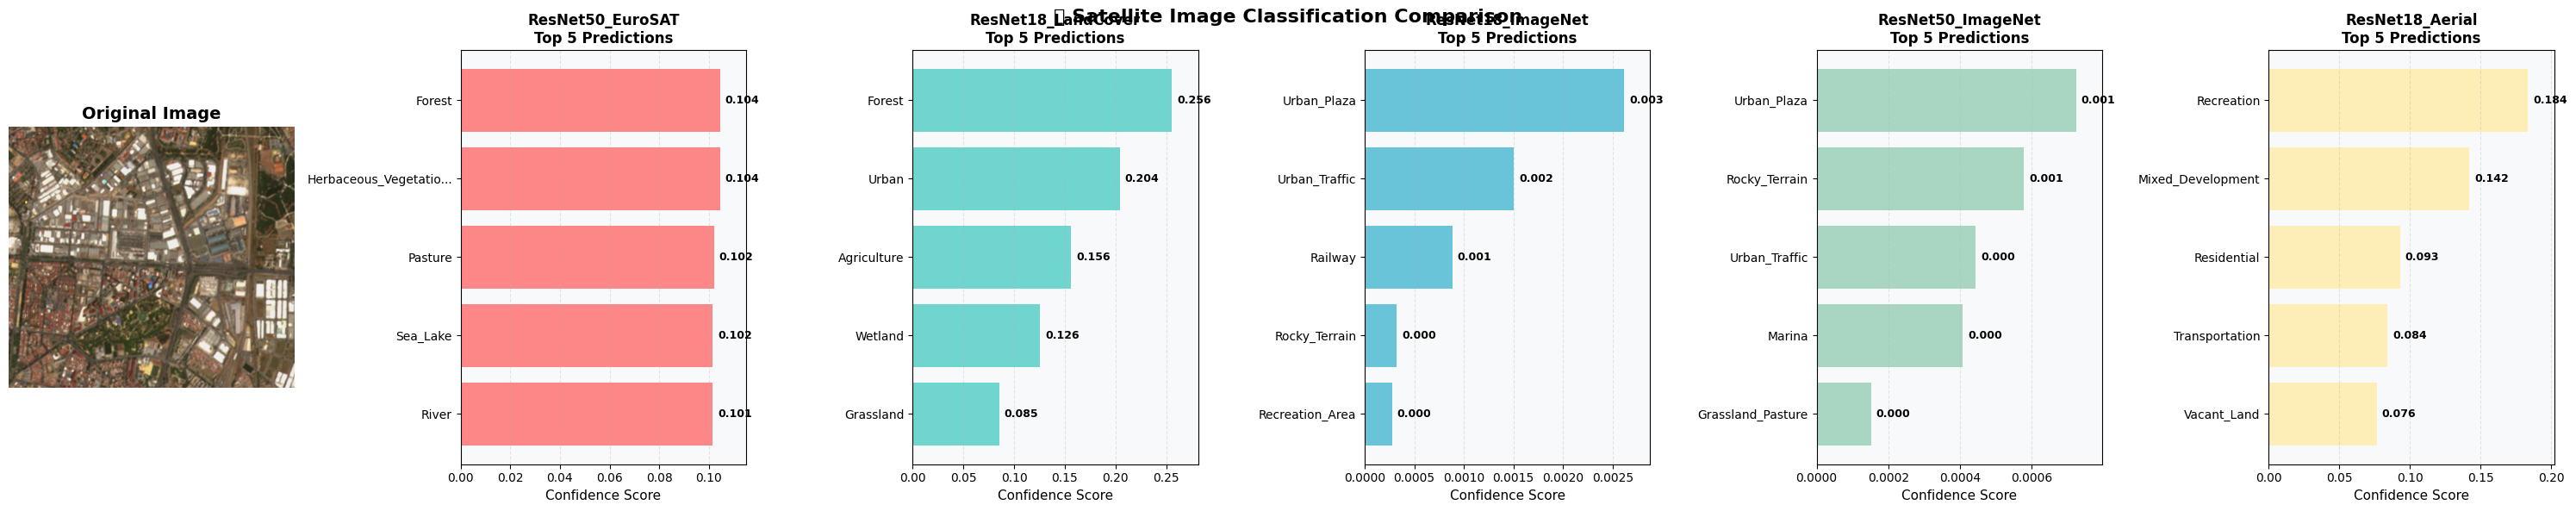

In [24]:
# Display section header
display_style(
    styles.section_header,
    "Interactive Visualization", 
    "Comprehensive comparison of model predictions",
    "📊"
)

if results:
    # Display info about visualization
    display_style(
        styles.info_card,
        "Generating Interactive Visualization",
        "This comparison chart shows predictions from all models side by side with confidence levels and detailed breakdowns."
    )
    
    try:
        # Generate the comparison visualization
        visualize_comparison(image_path, results, "🛰️ Satellite Image Classification Comparison")
        
        # Add interpretation guide
        display_style(styles.interpretation_guide)
        
    except Exception as e:
        display_style(
            styles.error_card,
            "Visualization Error",
            str(e)
        )
else:
    display_style(styles.no_results_warning)

## Step 4: Model Performance Summary and export

This last step provides a summary of the models processed and their classification results. It includes the number of models processed and a detailed output for each model's predictions.

In [25]:
# Display section header
display_style(
    styles.section_header,
    "Detailed Analysis & Export", 
    "In-depth results analysis and data export functionality",
    "📋"
)

if results:
    # Display enhanced results
    display_style(styles.detailed_results_display, results, image_path)
    
    # Export results with feedback
    try:
        display_style(
            styles.info_card,
            "Exporting Results",
            "Saving detailed analysis to files for further processing and review..."
        )
        
        # Export results
        export_results(mode='json', results=results, output_dir='../results')
        
        # Display export success
        display_style(styles.export_success_card, "../results/")
        
    except Exception as e:
        display_style(
            styles.error_card,
            "Export Error", 
            str(e)
        )
    
    # Display final summary
    display_style(styles.final_summary, results)
    
    # Console summary
    successful_models = [name for name, result in results.items() if 'error' not in result]
    print("\n" + "="*60)
    print("📊 FINAL SESSION SUMMARY")
    print("="*60)
    print(f"✅ Successfully processed: {len(successful_models)} models")
    print(f"❌ Failed models: {len(results) - len(successful_models)}")
    print(f"📁 Results exported to: ../results/")
    print(f"🕐 Session completed at: {datetime.now().strftime('%H:%M:%S')}")
    
    if successful_models:
        print(f"\n🏆 Best performing models:")
        # Sort by confidence and show top 3
        best_models = []
        for name in successful_models:
            if 'error' not in results[name]:
                confidence = results[name]['predictions'][0]['confidence']
                best_models.append((name, confidence))
        
        best_models.sort(key=lambda x: x[1], reverse=True)
        for i, (name, conf) in enumerate(best_models[:3], 1):
            print(f"   {i}. {name}: {conf:.3f}")
            
else:
    display_style(styles.no_results_warning)

✓ Results exported to ../results\classification_results_20250817_003329.json



📊 FINAL SESSION SUMMARY
✅ Successfully processed: 5 models
❌ Failed models: 0
📁 Results exported to: ../results/
🕐 Session completed at: 00:33:29

🏆 Best performing models:
   1. ResNet18_LandCover: 0.256
   2. ResNet18_Aerial: 0.184
   3. ResNet50_EuroSAT: 0.104
